<h1><center> Towards Identity Anonymization on Graphs</center></h1>

#### Amer Al Khoury $(4844260)$, Ziad Janpih $(4851321)$

In [32]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from random import randrange
import operator
import time
import multiprocessing as mp
import KDgree as kd

#### Function - readGraphFromFile -

A function that takes two parameters, finally generates a graph object of the networkX library, which is a library that helps to manipulate graphs:
1. **name:** The file name that contains the graph data
2. **andDraw:** A boolean variable that provides information about drawing the graph after reading the graph data or not 

In [2]:
def readGraphFromFile(name, andDraw = False):
    Data = open(name, "r")
    graphType = nx.Graph()
    graph = nx.parse_edgelist(Data, delimiter=',', create_using=graphType, nodetype=int)
    if (andDraw):
        nx.draw(graph)
    return graph

## 1. Introduction to Graphs

A graph is a nonlinear data structure that represents a pictorial structure of a set of objects that are connected by links. A graph represents data as a network. Two major components in a graph are nodes and edges. A node is a data element while an edge is a link that helps to connect vertices. There are mainly two types of graphs, directed and undirected graphs.

### 1.1. Undirected Graph

When a graph has an unordered pair of vertexes, it is an undirected graph. In other words, there is no specific direction to represent the edges. The nodes connect by undirected arcs, which are edges without arrows. If there is an edge between node A and node B, it is possible to traverse from B to A, or A to B as there is no specific direction.

<center><img src="./Images/Undirected Graph.png" alt="logo" width="250"/> </center>

Above is an undirected graph. There is no direction on any of the edges. It is possible to traverse from 2 to 3, 3 to 2, 1 to 3, 3 to 1, ... etc.
<br> Set of nodes (V) – {1, 2, 3, 4}
<br> Set of edges (E) – {(1, 2), (2, 1), (2, 3), (3, 2), (1, 3), (3, 1), (3, 4), (4, 3)}

### 1.2. Directed Graph

When a graph has an ordered pair of nodes, it is called a directed graph. The edges of the graph represent a specific direction from one node to another. When there is an edge representation as (V1, V2), the direction is from V1 to V2. The first element V1 is the initial or the start node. The second element V2 is the terminal or the end vertex.

<center><img src="./Images/Directed Graph.png" alt="logo" width="250"/> </center>

In the above graph, node A connects to node B. A is the initial node and node B is the terminal node. The direction is from A to B. Therefore; we cannot consider B to A direction. Similarly, node D connects to node B. D is the initial node while B is the terminal node. The direction is from D to B, and we cannot consider B to D. Likewise, the connected nodes have specific directions.
<br> Set of nodes (V) – {A, B, C, D, E, F}
<br> Set of edges (E) – {(A, B), (B, C), (C, E), (E, D), (D, E), (E, F)}

### 1.3. Degree Sequence

For an undirected graph $(G)$, a node $(v)$ degree is defined by the number of edges that it has. For a specific graph, we can create a *set* of all the graph's nodes degrees: $\big\{5, 4, 6, 4, 4, 2, 3\big\}$.
<br> Now we can define a degree sequence $(d_{G})$ of a graph $(G)$ as a decreasing order of its nodes' degrees: $\big\{6, 5, 4, 4, 4, 3, 2\big\}$

#### Function - getNodesDegreesArray -

A function that takes a graph object, and returns a degree sequence of the entered graph

In [3]:
def getNodesDegreesArray(graph):
    degrees = list(graph.degree())
    sortedDegrees = sorted(degrees, key=lambda x:x[1], reverse=True)
    return sortedDegrees

Or

#### Example:

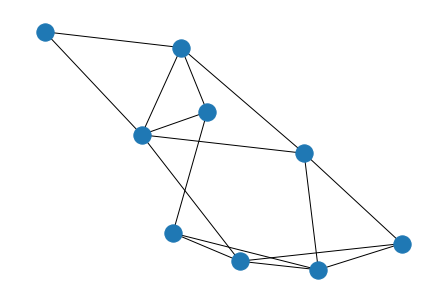

In [4]:
graph = readGraphFromFile('Datasets/Graph_10.csv', True)

In [5]:
degreeSequence = getNodesDegreesArray(graph)
print(degreeSequence)

[(8, 5), (1, 4), (4, 4), (6, 4), (5, 4), (2, 3), (3, 3), (9, 3), (7, 2)]


***

## 2. Graph Anonymization

Organizations or companies could sell data or graph data, but selling data as it is don't meet the privacy purposes of the users to that the data is related. So those organizations work on anonymizing the users' data before selling it. For example, the social data, which is represented as a graph, could suffer from privacy breaches that we can categorize into three categories:
1. **Identity Disclosure:** The identity of the individual who is associated with the node is revealed.
2. **Link Disclosure:** Sensitive relationships between two individuals are disclosed.
3. **Content Disclosure:** The privacy data associated with each node is breached, e.g., the individuals’ email sent and/or received in an email communication graph.

During the following study, we will foucus on the identity disclosure

### 2.1. K-degree Anonymization:

The anonymization process ensures that for each node $v$ inside a specific graph $G$, there are at least $k-1$ nodes that have the same degree as $v$.
<br>If a graph $G$ has $n$ nodes, so the degree sequance $d_{G}$ of graph $G$ is a vector of size $n = |V|$, such that $d_{G}(i)$ is a degree of the $i_{th}$ node of $G$. Also, the vector $d_{G}$ is in decreasing order that means $d_{G}(1) \ge d_{G}(2) \ge ... \ge d_{G}(n)$

We consider the vector $d_{G}$ is *k-anonymized* if every item in $d_{G}$ appear at least k times. So, a graph $G (V, E)$ is *k-anonymized* if the degree sequence of $G$, $d_{G}$, is *k-anonymized*. 
<br>For example: $v = [5, 5, 3, 3, 2, 2, 2]$ is *2-anonymized*
<br>Also, we can say. If a graph $G$ is $K_{1}$-degree anonymous, so it also $K_{2}$-degree anonymous, if and only if $K_{1} \ge K_{2}$

<center><img src="./Images/example KA.png" alt="logo" width="350"/> </center>

The left graph is 3-degree anonymous, and the right graph is 2-degree anonymous.

#### 2.1.1. Cost Function

We can measure the anonymization by using a cost function. The cost equation is written as below:
$$
\begin{equation}
L_{1}\big(d_{G}, d_{\hat{G}}\big) = \sum_{i=1}^{n} \Bigg| \, d_{\hat{G}}(i) - d_{G}(i) \, \Bigg| 
\end{equation}
$$

For a given Graph $G$, knowing that the anonymized graph is $\hat{G}$, the cost function is calculated by summing the differences between $d_{\hat{G}}$ and $d_{G}$ 


### 2.2. K-degree Anonymization Algorithms:

These algorithms work on taking as an input a graph $G$ and an integer $K$, in order to finally produce a k-degree anonymized graph $\hat{G}$. Taking into consideration minimizing the cost $L_{1}$. There are two algorithms work on achieving the previous definition, Dynamic Programming Algorithm and Greedy Approach Algorithm. In this section, we will see each algorithm in details.


#### 2.2.1. Dynamic Programming Algorithm (DP)

Let's assume that we have a graph $G$ with a degree sequance $d$ of dimention $n$, and according to the definition $d $ will be sorted in decreasing order, so:
$$
\begin{equation}
d\big(1\big) \ge d\big(2\big) \ge ... \ge d\big(n\big)
\end{equation}
$$

$Da\big(d[1,i]\big)$ be the degree anonymization cost of the sub-sequence $d[1,i]$. Also let, $I\big(d[i,j]\big)$ be the anonymization cost when all the elements from $d(i), d(i+1), ..., d(j)$ are assigned the same value as $d(i)$. i.e.
$$
\begin{equation}
I(d[i,j]) = \sum_{l=i}^{j}\big(d(i) - d(l)\big)
\end{equation}
$$

According to these assumptions, the dynamic algorithm is working as the following:
1. When, $k \gt \frac{i}{2}$, it is *impossible* to form two groups with distinct values. So, we put them in the same group. E.g. for a 3-Degree anonymization of a sub-sequence $d[1,4] = \big\{4,3,2,1\big\}$ has to be $\big\{4,4,4,4\big\}$. So, the cost of anonymization can be calculated like the following, 
$$
\begin{equation}
Da\big(d[1,i]\big) = I\big(d[1,i]\big)
\end{equation}
$$
<br>
2. When, $k \le \frac{i}{2}$ the degree sequence can be broken down in smaller sub-sequences recursively until the size of the sub-sequence follows *Condition 1*. At this stage, every recursive step will have some part of the degree sequence with a length $\lt 2k$ and for the rest of the sub-sequence we can apply the same method recurssively. And the total cost for that step will be sum over the cost of putting the a chunk in the same group and the cost of anonymizing the rest of the degree sequence recursively. And then we can *vary* the size of each chunk $t$ and take the take the anonymized sequence with mininum cost and return it to the previous recurssive stage in the *heap*.
<br>
$$
\begin{equation}
Da\big(d[1, i]\big) = \min\bigg\{ \min_{k \, \le \, t \, \le \, i-k}\Big\{Da\big(d[1, t]\big)+I\big(d[t+1, \, i-k]\big)\Big\}, \; I\big(d[1, i]\big)\bigg\}
\end{equation}
$$


##### Python Implementation

The algorithm implemenetation is as below:

In [6]:
def Identical(d):
    cost =sum(d[0][1]-d[i][1] for i in range(len(d)))
    I = [(d[i][0],d[0][1]) for i in range(len(d))]
    return cost, I
        
def DPA_GetAnonymizedDegrees(d, k):
    nodesCount = len(d)

    if  nodesCount < 2*k:
        return Identical(d)
    else:
        pairs=[]
        for t in range( k , nodesCount-k+1 , 1):
            DAcost,DA_d =DPA_GetAnonymizedDegrees(d[0:t],k)
            DA_Icost,DA_Id=Identical(d[t:nodesCount])
            All_cost=DAcost+DA_Icost
            All_d=DA_d+DA_Id
            Icost,Id=Identical(d[0:nodesCount])
            if(All_cost >Icost ):
                pairs.append((Icost,Id))
            else:
                pairs.append((All_cost,All_d))
            
        return   min(pairs, key=operator.itemgetter(0))





##### Checking if our algorithm actually works
Based on the previously created degree sequance, let's check our dynamic programing graph anonymization algorithm.

In [7]:
k = 3
cost, d_hat = DPA_GetAnonymizedDegrees(degreeSequence, k)
print("Original Degree Sequence")
print(degreeSequence)
print("Anonymized Degree Sequence")
print(d_hat)
print('Anonymization cost is : ', cost)

Original Degree Sequence
[(8, 5), (1, 4), (4, 4), (6, 4), (5, 4), (2, 3), (3, 3), (9, 3), (7, 2)]
Anonymized Degree Sequence
[(8, 5), (1, 5), (4, 5), (6, 4), (5, 4), (2, 4), (3, 3), (9, 3), (7, 3)]
Anonymization cost is :  4


##### Optimization
From observation, it can be confirmed that *no anonymous group* is larger than $2k − 1$. If any group is larger than or equal to $2k$, it can be *broken into two subgroups* with equal or lower overall degree-anonymization cost. Which essencially turns out that the preprocessing step $I\big(d[i,j]\big)$ does not need to consider all of the combinations of $\big(i,j\big)$ but only, $k \, \le \, j-i+1 \, \le \, 2k-1$.
<br>
Similarly, for every $i$, we do not have to consider all $t$’s in the range $k \le t \le i − k$ in Recursion, but only $t$’s in the range $\max\big\{k, i − 2k + 1\big\} \le t \le i − k$.
<br>
<br>
$$
\begin{equation}
Da\big(d[1, i]\big) = \min\bigg\{ \min_{\max\{k, \, i − 2k + 1\} \, \le \, t \,  \le \, i − k}\Big\{Da\big(d[1, t]\big)+I\big(d[t+1, i-k]\big)\Big\}, \; I\big(d[1, i]\big)\bigg\}
\end{equation}
$$

In [8]:
def DPA_GetAnonymizedDegrees_Optimized(d, k):
    nodesCount = len(d)

    if  nodesCount < 2*k:
        return Identical(d)
    else:
        pairs=[]
        min_t=max(k,(nodesCount - 2*k+1))
        for t in range( min_t , nodesCount-k+1 , 1):
            DAcost,DA_d =DPA_GetAnonymizedDegrees_Optimized(d[0:t],k)
            DA_Icost,DA_Id=Identical(d[t:nodesCount])
            All_cost=DAcost+DA_Icost
            All_d=DA_d+DA_Id
            Icost,Id=Identical(d[0:nodesCount])
            if(All_cost >Icost ):
                pairs.append((Icost,Id))
            else:
                pairs.append((All_cost,All_d))
            
        return   min(pairs, key=operator.itemgetter(0))

In [9]:

k = 3
cost, d_hat = DPA_GetAnonymizedDegrees_Optimized(degreeSequence, k)
print("Original Degree Sequence")
print(degreeSequence)
print("Anonymized Degree Sequence")
print(d_hat)
print('Anonymization cost is : ', cost)

Original Degree Sequence
[(8, 5), (1, 4), (4, 4), (6, 4), (5, 4), (2, 3), (3, 3), (9, 3), (7, 2)]
Anonymized Degree Sequence
[(8, 5), (1, 5), (4, 5), (6, 4), (5, 4), (2, 4), (3, 3), (9, 3), (7, 3)]
Anonymization cost is :  4


#### Memorized Dynamic Programing
There is one more way to bring down the run-time of this algorithm, that is by *memorization*.which ensures that a method doesn't run for the same inputs more than once by keeping a record of the results for the given inputs (usually in a hash map).<br>
In the whole recursion heap some anonymized sub-sequence (*t*) appears multiple number of times. To be more specific, every time when the tuple (*t, nodesCount*) appears. But we are spending computational resources every time. 
<br>
Instead we can **memorize** the *anonymization cost* and *anonymized sub-sequence* and recall it every time we encounter the specific tuple through out the entire heap. We will use (*t, nodesCount*) as **key** to store (anonymization cost, anonymized sub-sequence) as its **value** in a Dictionary called *cache*. By default Python Dictionary will store the key as a *hash* value in its key space. So, serching for a *value* using *key* is constant in time. Which, as opposed to storing them as lists will not affect the time complexity of the algorithm.   
<br>


In [10]:
def DPA_GetAnonymizedDegrees_Optimized_memorized(d, k,cache=dict()):
    if not cache :
        cache = dict()

    nodesCount = len(d)

    if  nodesCount < 2*k:
        return Identical(d)
    else:
        pairs=[]
        min_t=max(k,(nodesCount - 2*k+1))
        for t in range( min_t , nodesCount-k+1 , 1):
            if (t,nodesCount) in cache.keys():
                record_found = cache.get((t, nodesCount))
                t_cost, anonymized_t = record_found[0], record_found[1]
            else:  
                DAcost,DA_d =DPA_GetAnonymizedDegrees_Optimized_memorized(d[0:t],k,cache)
                DA_Icost,DA_Id=Identical(d[t:nodesCount])
                All_cost=DAcost+DA_Icost
                All_d=DA_d+DA_Id
                Icost,Id=Identical(d[0:nodesCount])
                if(All_cost >Icost ):
                    t_cost,anonymized_t=Icost,Id                   
                else:
                    t_cost,anonymized_t=All_cost,All_d              
                cache[(t, nodesCount)] = (t_cost,anonymized_t)
            pairs.append((t_cost,anonymized_t))
            
        return   min(pairs, key=operator.itemgetter(0))

#### 2.2.2. Greedy Aproach Algorithm (GA)

As the previous algorithm, let's assuem that we have a degree sequance $d$ of dimention n. This algorithm takes as an input a degree sequance $d$ and an integer $K$, and trys to generate k-degree anonymized degree sequance $\hat{d}$ according to below:
<br> The Greedy algorithm first forms a group consisting of the first $k$ highest-degree nodes and assigns to all of them degree $d\big(1\big)$. Then it checks whether it should merge the $\big(k + 1\big)_{th}$ node into the previously formed group or start a new group at position $\big(k + 1\big)$. For taking this decision the algorithm computes the following two costs:
$$
    \begin{equation}
        C_{merge} = \big(d\big(1\big) - d\big(k + 1\big)\big) + I\big(d\big[k+2, 2k+1\big]\big)
    \end{equation}
$$
and
$$
    \begin{equation}
        C_{new} = I\big(d\big[k+1, 2k\big]\big)
    \end{equation}
$$

If $C_{merge}$ is greater than $C_{new}$, a new group starts with the $\big(k + 1\big)_{th}$ node and the algorithm proceeds recursively for the sequence $d\big[k + 1, n\big]$. Otherwise, the $\big(k + 1\big)_{th}$ node is merged to the previous group and the $\big(k + 2\big)_{th}$ node is considered for merging or as a starting point of a new group. The algorithm terminates after considering all n nodes.

##### Python Implementation

The algorithm implemenetation is as below:

In [11]:
def calc_I(d):
    I_cost =sum(abs(d[0][1] - e[1])for e in d)
    return I_cost

def calc_Cmerge(d, k):
    m_cost=(d[0][1]-d[k][1])+calc_I(d[k+1:min(k*2,len(d))])
    return m_cost

def calc_Cnew(d, k):
    Cnew = calc_I(d[k: min(k*2,len(d))])
    return Cnew
def GA_GetAnonymizedDegrees(d, k):
    new_group=[(d[i][0],d[0][1]) for i in range(k)]
    merge=True
    index=0
    while(merge):
        if(len(d[index:])<= k):
            rest =[(e[0],d[0][1]) for e in d[k+index:]]
            rrr=new_group+rest
            return rrr
        cMerge = calc_Cmerge(d[index:],k)
        cNew = calc_Cnew(d[index:], k)
        if (cMerge > cNew and len(d[k+index:]) >= k):
            merge=False
            return new_group+GA_GetAnonymizedDegrees(d[k+index:],k)
        else:
            new_group.append((d[k+index][0],d[0][1]))
            index +=1


##### Checking if our algorithm actually works
Based on the previously created degree sequance, let's check our Greedy Aproach graph anonymization algorithm.

In [12]:

k = 3
d_hat = GA_GetAnonymizedDegrees(degreeSequence, k)
print("Original Degree Sequence")
print(degreeSequence)
print("Anonymized Degree Sequence")
print(d_hat)
cost =sum(abs(d_hat[i][1]-degreeSequence[i][1])for i in range(len(degreeSequence)))
print('Anonymization cost is : ', cost)

Original Degree Sequence
[(8, 5), (1, 4), (4, 4), (6, 4), (5, 4), (2, 3), (3, 3), (9, 3), (7, 2)]
Anonymized Degree Sequence
[(8, 5), (1, 5), (4, 5), (6, 4), (5, 4), (2, 4), (3, 3), (9, 3), (7, 3)]
Anonymization cost is :  4


***

## 3. Anonymized Graph Construction

After creating an anonymized degree sequance, we need to construct a graph $\hat{G}$ according to anonymized degree sequance $\hat{d}$. So for a given graph $G\big(V, E\big)$ and an anonymized degree sequance $\hat{d}$ output by one of the previous algorithms **DP** or **GA**, we need to construct a new graph $\hat{G}\big(V, \hat{E}\big)$ with $\hat{E} \cap E = E$ and a degree sequance $d_{\hat{G}}$ with $d_{\hat{G}} = \hat{d}$

### 3.1. Construct Graph Algorithm

The **ConstructGraph** algorithm takes as input the desired degree sequence $d$ and outputs a graph with exactly this degree sequence, if such graph exists. Otherwise it outputs a *“No”* if such graph does not exist. The algorithm is iterative and in each step it maintains the residual degrees of vertices. In each iteration it picks an arbitrary node $v$ and adds edges from $v$ to $d\big(v\big)$ nodes of highest residual degree, where $d\big(v\big)$ is the residual degree of $v$. The residual degrees of these $d\big(v\big)$ nodes are decreased by one. If the algorithm terminates and outputs a graph, then this graph has the desired degree sequence. If at some point the algorithm cannot make the required number of connections for a specific node, then it outputs *“No”* meaning that the input degree sequence is not realizable.

Note that the **ConstructGraph** algorithm is an oracle for the realizability of a given degree sequence; if the algorithm outputs *“No”*, then this means that there does not exist a simple graph with the desired degree sequence.

#### Function - getRandomIndex -

A function that takes one parameter, finally provide an index of the input array that has the highest value
1. **d:** an anonymized degree sequance

In [13]:
def getRandomIndex(d):
    positiveValues = d[d>0]
    positiveValueIndex = randrange(np.size(positiveValues))
    return np.argmax(d == positiveValues[positiveValueIndex])

#### Python Implementation

The algorithm implemenetation is as below:

In [14]:
def getVdv(d, nodeIndex, numberOfConnection):
    tempd = np.copy(d)
    vdv = np.empty(0)
    while True:
        index = np.argmax(tempd)
        allIndexes = np.where(d == d[index])[0]
        for i in range(0, np.size(allIndexes)):
            tempd[allIndexes[i]] = 0
            vdv = np.append(vdv, allIndexes[i])
            if (np.size(vdv) == numberOfConnection):
                break
        if (np.size(vdv) == numberOfConnection):
            break; 
    return vdv
    
    
def graphGenerate(d):
    dnp = np.array(list(map(lambda x:x[1], d)))
    newGraph = nx.Graph()
    newGraph.add_nodes_from([d[i][0] for i in range(0,len(d))])
    #print(newGraph.nodes)
    if (np.sum(dnp) % 2 != 0):
        return ('No', None)
    while True:
        if (np.size(dnp[dnp<0]) > 0):
            return ('Unrelaiable', None)
        if (np.size(dnp[dnp == 0]) == np.size(dnp)):
            return ('', newGraph)
        nodeIndex = getRandomIndex(dnp)
        numberOfConnection = dnp[nodeIndex]
        dnp[nodeIndex] = 0
        vdv = getVdv(dnp, nodeIndex, numberOfConnection)
        for i in range(0, np.size(vdv)):
            index = int(vdv[i])
            dnp[index] = dnp[index] - 1
            currentNode = d[nodeIndex][0]
            connectedNode = d[index][0]
            newGraph.add_edge(currentNode, connectedNode)

#### Checking if our algorithm actually works
Based on the previously created algorithm, let's check our work.

[(8, 5), (1, 5), (4, 5), (6, 4), (5, 4), (2, 4), (3, 3), (9, 3), (7, 3)]


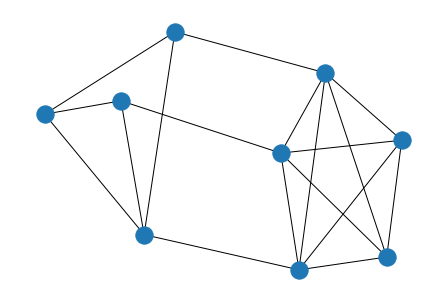

In [15]:
d_hat = GA_GetAnonymizedDegrees(degreeSequence, k)
print(d_hat)
data = graphGenerate(d_hat)
if data[0] == '':
    nx.draw(data[1])
else:
    print(data[0])

### 3.2. SuperGraph Algorithm

Another algorithm works as an extension of the **ConstractGraph** algorithm, it is called the **SuperGraph** algorithm. The inputs of this algorithm are the original graph $G$ and the desired k-anonymous degree distribution \hat{d}. The algorithm operates on the sequence of additional degrees $a = \hat{d} - d_{G}$ in a manner similar to the one the **ConstractGraph** algorithm operates on the degrees $d$. However, since $\hat{G}$ is drawn on top of the original graph $G$, we have the additional constraint that edges already in $G$ cannot be drawn again.

It proceeds iteratively and in each step it maintains the residual additional degrees a of the vertices. In each iteration it picks an arbitrary vertex $v$ and adds edges from $v$ to $a\big(v\big)$ vertices of highest residual additional degree, ignoring nodes $v_{0}$ that are already connected to $v$ in $G$. For every new edge $\big(v,v_{0}\big), a\big(v_{0}\big)$ is decreased by 1. If the algorithm terminates and outputs a graph, then this graph has degree sequence $\hat{d}$ and is a supergraph of the original graph. If the algorithm does not terminate, then it outputs *“Unknown”*, meaning that there might exist a graph, but the algorithm is unable to find it. Though **Supergraph** is similar to **ConstructGraph**, it is not an oracle. That is, if the algorithm does not return a graph $\hat{G}$ supergraph of $G$, it does not necessarily mean that such a graph does not exist.

#### Python Implementation

The algorithm implemenetation is as below:

In [16]:
#Subgraph Generation
def superGraphAlgorithm(graph, k, dNew):
    d = getNodesDegreesArray(graph)
    originalDegrees = np.array(list(map(lambda x:x[1], d)))
    anonymizedDegrees = np.array(list(map(lambda x:x[1], dNew)))
    a = anonymizedDegrees - originalDegrees
    if (np.sum(a) % 2 != 0):
        return ('No', None)
    while True:
        if (np.size(a[a<0]) > 0):
            return ('Unrelaiable', None)
        if (np.size(a[a == 0]) == np.size(a)):
            return ('', graph)
        nodeIndex = getRandomIndex(a)
        numberOfRemainingConnecions = a[nodeIndex]
        a[nodeIndex] = 0
        vdv = getVdv(a, nodeIndex, numberOfRemainingConnecions)
        for i in range(0, np.size(vdv)):
            index = int(vdv[i])
            a[index] = a[index] - 1
            currentNode = dNew[nodeIndex][0]
            connectedNode = dNew[index][0]
            graph.add_edge(currentNode, connectedNode)

#### Checking if our algorithm actually works
Based on the previously created algorithm, let's check our work.

[(8, 5), (1, 5), (4, 5), (6, 4), (5, 4), (2, 4), (3, 3), (9, 3), (7, 3)]


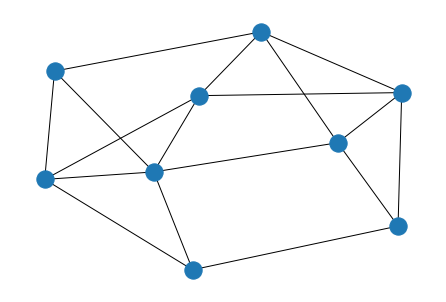

In [17]:
copyGraph = graph.copy()
d_hat = GA_GetAnonymizedDegrees(degreeSequence, k)
print(d_hat)
data = superGraphAlgorithm(copyGraph, k, d_hat)
if data[0] == '':
    nx.draw(data[1])
else:
    print(data[0])

### 3.3. The Probing Scheme Algorithm

The **Probing** scheme algorithm introduced to force the **supergraph** algorithm to output the desired k-degree anonymous graph with a little extra cost. This scheme is in fact a randomized iterative process that tries to slightly change the degree sequance $\hat{d}$.

This algorithm takes as an input a graph $G\big(V, E\big)$ and an integer $K$, the **Probing** scheme first construct the k-anonymous sequance $\hat{d}$ by invoking the **DP** or **GA**. If the subsequent call to the **Supergraph** algorithm returns a graph $\hat{G}$, then the **Probing** outputs this graph and halts. Otherwise, if the **Supergraph** algorithm returns *"No"* or *"Unknown"*, then the **Probing** slightly increase some of the entries in $d$ via the addition of uniform noise. The new noisy version of $d$ is then fed as input to **DP** or **GA** again. 
A new version of the $\hat{d}$ is thus constructed and input to the Supergraph algorithm to be checked. The process of noise addition and checking is repeated until a graph is output by Supergraph. Note that this process will always terminate because in the worst case, the noisy version of $d$ will contain all entries equal to $n - 1$, and there exists a complete graph that satisfies this sequence and is k-degree anonymous with $E \subseteq \hat{E}$

#### Python Implementation

The algorithm implemenetation is as below:

In [18]:
def addNoiseTo(d):
    nodeNumber = len(d)
    noise = np.random.choice([0, 1], size= nodeNumber)
    for i in range(0, nodeNumber):
        if d[i][1] < nodeNumber - 1:
            d[i] = (d[i][0], d[i][1] + noise[i])
        
    sortedD = sorted(d, key=lambda x:x[1], reverse=True)
    return sortedD
    
    
def probingScheme(graph, k):
    d = getNodesDegreesArray(graph)
    dNew = GA_GetAnonymizedDegrees(d, k)
    data = superGraphAlgorithm(graph, k, dNew)
    while data[0] == 'No' or data[0] == 'Unrelaiable':
        d = addNoiseTo(d)
        dNew = GA_GetAnonymizedDegrees(d, k)
        data = superGraphAlgorithm(graph, k, dNew)
    return data[1]

#### Checking if our algorithm actually works
Based on the previously created algorithm, let's check our work.

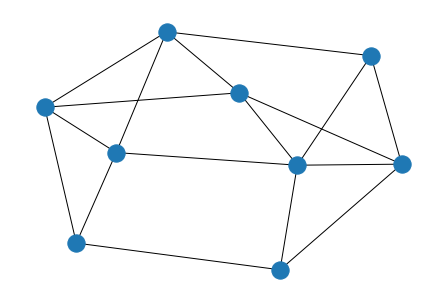

In [19]:
copyGraph = graph.copy()
newGraph = probingScheme(copyGraph, k)
nx.draw(newGraph)

### 3.4. The Greedy_Swap Algorithm

Let $\hat{d}$ be a k-anonymous degree sequence output by **DP** or **GA** algorithms. Let's additionally assume for now, that $\hat{d}$ is realizable so that the **ConstructGraph** algorithm with input $\hat{d}$, outputs a simple graph $\hat{G}_{0}\big(V, \hat{E}_{0}\big)$ with degree sequence exactly $\hat{d}$. Although $\hat{G}_{0}$ is k-degree anonymous, its structure may be quite different from the original graph $G\big(V, E\big)$. The **Greedy_Swap** algorithm is a greedy heuristic that given $\hat{G}_{0}$ and $G$, it transforms $\hat{G}_{0}$ into $\hat{G}\big(V, \hat{E}\big)$ with degree sequence $d_{\hat{G}} = \hat{d} = d_{\hat{G}_{0}}$ and $E \cap \hat{E} \approx E$. 

At every step $i$, the graph $\hat{G}_{i-1}\big(V, \hat{E}_{i-1}\big)$ is transformed into graph $\hat{G}_{i}\big(V, \hat{E}_{i}\big)$ such that $\hat{d}_{\hat{G}_{0}} = \hat{d}_{\hat{G}_{i-1}} = \hat{d}_{\hat{G}_{i}} = \hat{d}$ and $\big|\hat{E}_{i}\cap E\big| \gt \big|\hat{E}_{i-1}\cap E\big|$. The transformation is done via valid swap operation:
<br>**Transformation:**
<br>*Consider graph $\hat{G}_{i}\big(V, \hat{E}_{i}\big)$. A valid swap operation is defined by four nodes $i, j, k$ and $l$ of $\hat{G}_{i}\big(V, \hat{E}_{i}\big)$ such that $\big(i, k\big) \in \hat{E}_{i}$ and $\big(j, l\big) \in \hat{E}_{i}$ and $\big(i, j\big) \notin \hat{E}_{i}$ and $\big(k, l\big) \notin \hat{E}_{i}$, or, $\big(i, l\big) \notin \hat{E}_{i}$ and $\big(j, k\big) \notin \hat{E}_{i}$. A valid swap operation trasforms $\hat{G}_{i}$ to $\hat{G}_{i+1}$ by updating the edges as following:*
$$
    \begin{equation}
        \hat{E}_{i+1} \longleftarrow \hat{E}_{i} \backslash \big\{\big(i, k\big), \big(j, l\big)\big\} \cup \big\{\big(i, j\big), \big(k, l\big)\big\}
    \end{equation}
$$
$$
    \begin{equation}
        \hat{E}_{i+1} \longleftarrow \hat{E}_{i} \backslash \big\{\big(i, k\big), \big(j, l\big)\big\} \cup \big\{\big(i, l\big), \big(j, k\big)\big\}
    \end{equation}
$$

<center><img src="./Images/GreedySwap.png" alt="logo" width="450"/> </center>


#### Python Implementation

The algorithm implemenetation is as below:

In [20]:
def graphConstruction(graph, k):
    G0 = probingScheme(graph.copy(),k)
    G = Greedy_Swap(graph, G0)
    return G

def Pick20EdgesOf(edgesArr):
    neededEdges = []
    indexes = np.empty(0)
    for i in range(0, 20):
        randomIndex = np.random.randint(0, len(edgesArr), 1)
        while True:
            if randomIndex in indexes[:]:
                randomIndex = np.random.randint(0, len(edgesArr), 1)
            else:
                indexes = np.append(indexes, randomIndex)
                break
    
    for i in range(0, len(indexes)):
        idx = int(indexes[i])
        currentEdge = edgesArr[idx]
        neededEdges.append(currentEdge)
    return neededEdges
    
def FindMaxSwap(graph, newGraph, currentNumberOfIntersection):
    currentDegrees = np.array([val for (node, val) in newGraph.degree()])
    newTemp = newGraph.copy()
    intersectedGraph = nx.algorithms.operators.binary.intersection(graph, newGraph)
    c = len(intersectedGraph.edges)
    allEdges = list(newGraph.edges)
    neededEdges = None
    if (len(allEdges) <= 20):
        neededEdges = allEdges
    else:
        neededEdges = Pick20EdgesOf(allEdges)
    returncurrent = None
    returnSwap = None
    returne1 = None
    returne2 = None
    for i in range(0, len(neededEdges)):
        newTemp = newGraph.copy()
        currentEdge = neededEdges[i]
        for j in  range(i+1, len(neededEdges)):
            newTemp = newGraph.copy()
            swapedEdge = neededEdges[j]
            if (currentEdge[0] != swapedEdge[0]) and (currentEdge[0] != swapedEdge[1]) and (currentEdge[1] != swapedEdge[0]) and (currentEdge[1] != swapedEdge[1]):
                e1 = (currentEdge[0], swapedEdge[0])
                e2 = (currentEdge[1], swapedEdge[1])
                newTemp.remove_edges_from([currentEdge, swapedEdge])
                newTemp.add_edges_from([e1, e2])
                intersectedGraph = nx.algorithms.operators.binary.intersection(graph, newTemp)
                newDegrees = np.sort(np.array([val for (node, val) in newTemp.degree()]))[::-1]
                if (len(intersectedGraph.edges) > c) and (np.array_equal(currentDegrees, newDegrees)):
                    c = len(intersectedGraph.edges)
                    returncurrent = currentEdge
                    returnSwap = swapedEdge
                    returne1 = e1
                    returne2 = e2
                    break
                
                newTemp = newGraph.copy()
                e1 = (currentEdge[0], swapedEdge[1])
                e2 = (currentEdge[1], swapedEdge[0])
                newTemp.remove_edges_from([currentEdge, swapedEdge])
                newTemp.add_edges_from([e1, e2])
                intersectedGraph = nx.algorithms.operators.binary.intersection(graph, newTemp)
                newDegrees = np.sort(np.array([val for (node, val) in newTemp.degree()]))[::-1]
                if (len(intersectedGraph.edges) > c) and (np.array_equal(currentDegrees, newDegrees)):
                    c = len(intersectedGraph.edges)
                    returncurrent = currentEdge
                    returnSwap = swapedEdge
                    returne1 = e1
                    returne2 = e2
                    break
        if returncurrent != None:
            break
    
    return (c, [returncurrent, returnSwap, returne1, returne2])

def Greedy_Swap(originalGraph, G0):
    graph = G0
    sw = FindMaxSwap(originalGraph, graph, 0)
    c = sw[0]
    edges = sw[1]
    newdegrees = [val for (node, val) in graph.degree()]
    while (c > 0):
        if (edges[0] != None):
            graph.remove_edge(*edges[0])
            graph.remove_edge(*edges[1])
            graph.add_edge(*edges[2])
            graph.add_edge(*edges[3])
        sw = FindMaxSwap(originalGraph, graph, 0)
        if (sw[0] <= c):
            break
        else:
            c = sw[0]
            edges = sw[1]
    return graph

#### Checking if our algorithm actually works
Based on the previously created algorithm, let's check our work.

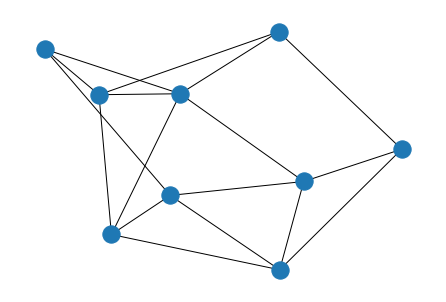

In [21]:
copyGraph = graph.copy()
k = 3
newGraph = graphConstruction(copyGraph, k)
nx.draw(newGraph)

### 3.5. The Priority Algorithm

An additional modification of the **ConstructGraph** algorithm that allows the construction of degree anonymous graphs with similar high edge intersection with the original graph directly, without using **Greedy_Swap**. We call this algorithm the Priority algorithm because during the graph-construction phase, it gives priority to already existing edges in the input graph $G\big(V , E\big)$. The intersections we obtain using the **Priority** algorithm are comparable, if not better, to the intersections we obtain using the **Greedy_Swap** algorithm. However, the **Priority** algorithm is less computationally demanding than the naive implementation of the **Greedy_Swap** procedure.

The **Priority** algorithm is similar to the **ConstructGraph**. Recall that the **ConstructGraph** algorithm at every step picks a node $v$ with residual degree $\hat{d}\big(v\big)$ and connects it to $\hat{d}\big(v\big)$ nodes with the highest residual degree. **Priority** works in a similar manner with the only difference that it makes two passes over the sorted degree $\hat{d}$ of the remaining nodes. In the first pass, it considers only nodes $\acute{v}$ such that $\hat{d}\big(\acute{v}\big) \gt 0$ and edge $\big(v, \acute{v}\big) \in E$. If there are less that $\hat{d}\big(v\big)$ such nodes it makes a second pass considering nodes $\acute{v}$ such that $\hat{d}\big(v\big) \gt 0$ and edge $\big(v, \acute{v}\big) \notin E$. In that way **Priority** tries to connect node $v$ to as many of his neighbors in the input graph $G$. The graphs thus constructed share lots of edges with the input graph. In terms of running time, the **Priority** algorithm is the same as **ConstructGraph**.

In the case where **Priority** fails to construct a graph by reaching a dead-end in the edge-allocation process, the **Probing** scheme is employed; and random noise addition is enforced until the **Priority** algorithm outputs a valid graph.

#### Python Implementation

The algorithm implemenetation is as below:

In [22]:
def getNodeIndex(nodes, nodeName):
    nodeIndex = np.argmax(nodes == nodeName)
    return nodeIndex

def getVdvPriority(originalGraph, currentGraph, dNew, npDNew, nodeName, nodeIndex, numberOfConnection):
    nodes = np.array(list(map(lambda x: x[0], dNew)))
    tempd = np.copy(npDNew)
    vdv = np.empty(0)
    currentNodeEdges = list(currentGraph.edges(nodeName))
    currentConnectedNodes = list(map(lambda x:x[1], currentNodeEdges))
    
    connectedNodes = np.array(list(map(lambda x: x[1],list(originalGraph.edges(nodeName)))))
    filteredConnectedNodes = list(filter(lambda x: x not in currentConnectedNodes, connectedNodes))
    for i in range(0, np.size(connectedNodes)):
        idx = getNodeIndex(nodes, connectedNodes[i])
        tempd[idx] = 0.0
        if (connectedNodes[i] in filteredConnectedNodes):
            vdv = np.append(vdv, idx)
        
    if np.size(vdv) < numberOfConnection:
        while True:
            index = np.argmax(tempd)
            allIndexes = np.where(npDNew == npDNew[index])[0]
            for i in range(0, np.size(allIndexes)):
                if tempd[allIndexes[i]] != 0.0:
                    tempd[allIndexes[i]] = 0.0
                    vdv = np.append(vdv, allIndexes[i])
                    if (np.size(vdv) == numberOfConnection):
                        break
            if (np.size(vdv) == numberOfConnection):
                break;
    else:
        vdv = vdv[0:numberOfConnection]
    return vdv
    
    
def PriorityAlgorithm(originalGraph, dNew):
    #start_timer = time.time()
    newGraph = nx.Graph()
    newGraph.add_nodes_from([dNew[i][0] for i in range(0,len(dNew))])
    npDNew = np.array(list(map(lambda x:x[1], dNew)))
    if (np.sum(npDNew) % 2 != 0):
        #end_timer = time.time()
        #print('It takes: ', end_timer-start_timer)
        return ('No', None)
    while True:
        if (np.size(npDNew[npDNew<0]) > 0):
            #end_timer = time.time()
            #print('It takes: ', end_timer-start_timer)
            return ('Unrelaiable', None)
        if (np.size(npDNew[npDNew == 0]) == np.size(npDNew)):
            #end_timer = time.time()
            #print('It takes: ', end_timer-start_timer)
            return ('', newGraph)
        nodeIndex = getRandomIndex(npDNew)
        numberOfConnection = npDNew[nodeIndex]
        npDNew[nodeIndex] = 0
        nodeName = dNew[nodeIndex][0]
        vdv = getVdvPriority(originalGraph, newGraph, dNew, npDNew, nodeName, nodeIndex, numberOfConnection)
        for i in range(0, np.size(vdv)):
            index = int(vdv[i])
            npDNew[index] = npDNew[index] - 1
            destNode = dNew[index][0]
            newGraph.add_edge(nodeName, destNode)
            
def checkPriority(graph, k):
    #start_timer = time.time()
    d = getNodesDegreesArray(graph)
    dNew = GA_GetAnonymizedDegrees(d, k)
    data = PriorityAlgorithm(graph, dNew)
    #print('First:', data[0])
    while data[0] == 'No' or data[0] == 'Unrelaiable':
        d = addNoiseTo(d)
        dNew = GA_GetAnonymizedDegrees(d, k)
        data = PriorityAlgorithm(graph, dNew)
        #print('Loop:', data[0])
    #end_timer = time.time()
    #print('It takes: ', end_timer-start_timer)
    return data[1]

#### Checking if our algorithm actually works
Based on the previously created algorithm, let's check our work.

[(8, 7), (8, 1), (8, 5), (8, 6), (8, 9), (1, 3), (1, 7), (1, 2), (1, 4), (4, 3), (4, 2), (4, 6), (4, 5), (6, 2), (6, 5), (5, 7), (2, 9), (3, 9)]


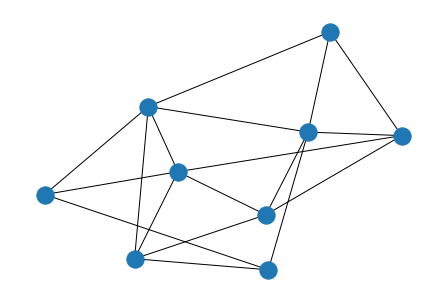

In [24]:
copyGraph = graph.copy()
k = 3
newGraph = checkPriority(copyGraph, k)
print(list(newGraph.edges))
nx.draw(newGraph)

## 4. EXPERIMENTS
In this section we evaluate the performance of the proposed
graph-anonymization algorithms.

### 4.1 Datasets
We use both synthetic and real-world datasets. For the
experiments with synthetic datasets, we generate random and scale-free graphs.<br>
#### 4.1.1 Synthetic Datasets
**Random graphs:** Random graphs are graphs with nodes
randomly connected to each other with probability p. Given
the number of nodes n and the parameter p, a random graph
is generated by creating an edge between each pair of nodes
u and v with probability p.<br>

#### 4.1.2 real-world Datasets
**Social circles-Facebook :** This dataset (available at https://snap.stanford.edu/data/ego-Facebook.html) consists of 'circles' (or 'friends lists') from Facebook. Facebook data was collected from survey participants using this Facebook app.<br>
The dataset contains of 4039 Nodes and 88234 Edges.<br>
**LastFM Asia Social Network** A social network of LastFM users(available at https://snap.stanford.edu/data/feather-lastfm-social.html)  which was collected from the public API in March 2020. Nodes are LastFM users from Asian countries and edges are mutual follower relationships between them.<br>
The dataset contains of 7624 Nodes and 27806 Edges.<br>



### 4.2 Evaluating Degree Anonymization algorithms
In this experiment we compare the performance (execution time) of the **Dynamic Programming Algorithm (DP)** , the **Optimization DP** algorithm and the **Memorized DP** 

#### 4.2.1 performance as a function of K
Here we measure the performance of the three algorithms while K is increasing with the Synthetic Datasets  (40 nodes) 

In [25]:
def performance_time(degree_Sequence , k, algorithm):
     start_timer = time.time()
     algorithm(degree_Sequence, k)
     end_timer = time.time()
     return end_timer-start_timer

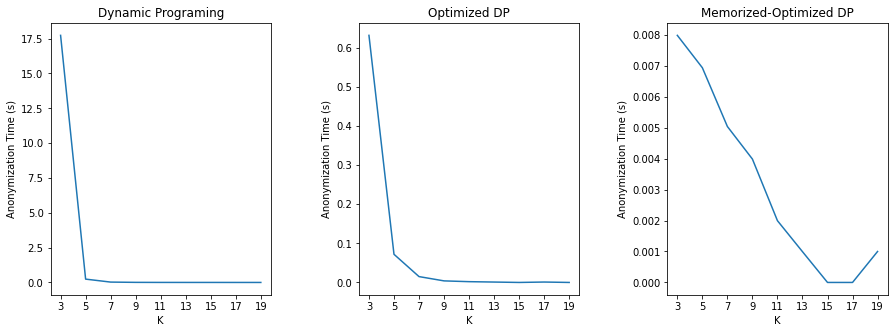

In [26]:
Random_graph=nx.fast_gnp_random_graph(n=40,p=0.1,directed=False)
Random_graph_DS = getNodesDegreesArray(Random_graph)
k_list= [ki for ki in range(3,20,2)]

DP_performance_time= [performance_time(Random_graph_DS,ki,DPA_GetAnonymizedDegrees) for ki in k_list]
DP_opt_performance_time= [performance_time(Random_graph_DS,ki,DPA_GetAnonymizedDegrees_Optimized) for ki in k_list]   
DP_mem_performance_time= [performance_time(Random_graph_DS,ki,DPA_GetAnonymizedDegrees_Optimized_memorized) for ki in k_list]   

performance=[DP_performance_time,DP_opt_performance_time,DP_mem_performance_time]
titles=["Dynamic Programing","Optimized DP","Memorized-Optimized DP"]
alorithms=['DP', 'DP_opt' ,'DP_mem']
figure,(alorithms) = plt.subplots(1, 3,figsize=(15,5))
figure.subplots_adjust(hspace=0.4, wspace=0.4)
for i,a in enumerate(alorithms):
    a.plot(k_list, performance[i])
    a.set_xticks(k_list)
    a.set_xlabel("K")
    a.set_ylabel("Anonymization Time (s)")
    a.set_title(titles[i])  



#### 4.2.2 performance as a function of N (Number of Nodes)
Here we measure the performance of the three algorithms while N (Number of nodes) is increasing with K = 3) 

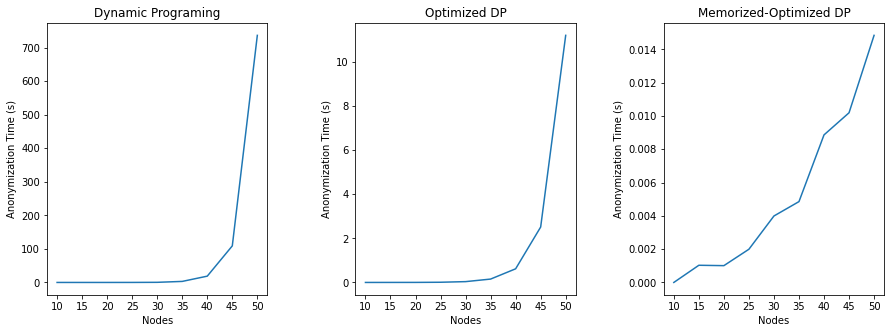

In [27]:

nodes= [n for n in range(10,51,5)]
graphs= [getNodesDegreesArray(nx.fast_gnp_random_graph(n,p=0.1,directed=False)) for n in nodes]

DP_performance_time= [performance_time(g_ds,3,DPA_GetAnonymizedDegrees) for g_ds in graphs]
DP_opt_performance_time= [performance_time(g_ds,3,DPA_GetAnonymizedDegrees_Optimized) for g_ds in graphs]   
DP_mem_performance_time= [performance_time(g_ds,3,DPA_GetAnonymizedDegrees_Optimized_memorized) for g_ds in graphs]   

performance=[DP_performance_time,DP_opt_performance_time,DP_mem_performance_time]
titles=["Dynamic Programing","Optimized DP","Memorized-Optimized DP"]
alorithms=['DP', 'DP_opt' ,'DP_mem']
figure,(alorithms) = plt.subplots(1, 3,figsize=(15,5))
figure.subplots_adjust(hspace=0.4, wspace=0.4)
for i,a in enumerate(alorithms):
    a.plot(nodes, performance[i])
    a.set_xticks(nodes)
    a.set_xlabel("Nodes")
    a.set_ylabel("Anonymization Time (s)")
    a.set_title(titles[i]) 


### 4.2.3  performance ratio
The goal of this experiment is to compare the qualitative
performance of the **Greedy** and **DP** algorithms in solving
the Degree Anonymization problem. We report the results
in terms of the performance ratio **R** which is the ratio
of the cost of the solution obtained by the Greedy algorithm
to the optimal cost obtained by the DP algorithm.<br>
$$
\begin{equation}
R = \frac{L\big(\hat{d}_{greedy} - d\big)}{L\big(\hat{d}_{dp} - d\big)}
\end{equation}
$$
<br>
where **d** is the input degree sequence;<br>
$\hat{d}_{greedy}$and $\hat{d}_{dp}$
 are the k-anonymous degree sequences output
by the **Greedy** and the **DP** algorithms respectively. Values
of R close to 1 imply that the two algorithms achieve
exactly the same cost, in which case **Greedy** performs optimally.
The closer **R** is to 1, the better the performance of
the Greedy algorithm.

#### Structural properties of the graphs used for the experiments.

|     | # Nodes | # Edges |
| --- | --- | --- |
| Random_graph | 1000 | $\approx$ 50000 |
| Social circles-Facebook| 4039 | 88234 |
| LastFM Asia Social Network| 7624 | 27806 |


In [28]:
def performance_ratio(degree_Sequence , k):

    DPA_cost, DPA_GetAnonymized = DPA_GetAnonymizedDegrees_Optimized_memorized(degree_Sequence, k)

    GA_GetAnonymized=GA_GetAnonymizedDegrees(degree_Sequence, k)
    GA_cost= (sum(abs(GA_GetAnonymized[i][1]-degree_Sequence[i][1])for i in range(len(GA_GetAnonymized))) )
    
    return GA_cost/DPA_cost

In [ ]:

pool = mp.Pool(mp.cpu_count())

Random_graph=nx.fast_gnp_random_graph(n=1000,p=0.1,directed=False)
Social_circles =kd.readGraphFromFile('Datasets/Social_circles.csv', False)
LastFM =kd.readGraphFromFile('Datasets/LastFM.csv', False)

Random_graph_DS = kd.getNodesDegreesArray(Random_graph)         # degree Sequence for Random_graph
Social_circles_DS = kd.getNodesDegreesArray(Social_circles)     # degree Sequence for Social_circles
LastFM_DS = kd.getNodesDegreesArray(LastFM)                     # degree Sequence for LastFM

k_list= [ki for ki in range(3,21,2)]

Random_graph_performance_ratio= [pool.apply_async(kd.performance_ratio,args=(Random_graph_DS,ki)) for ki in k_list]
Social_circles_performance_ratio= [pool.apply_async(kd.performance_ratio,args=(Social_circles_DS,ki)) for ki in k_list]
LastFM_performance_ratio= [pool.apply_async(kd.performance_ratio,args=(LastFM_DS,ki)) for ki in k_list]

R_results = [r.get() for r in Random_graph_performance_ratio]
R_results.sort(key=lambda x: x[0])

S_results = [r.get() for r in Social_circles_performance_ratio]
S_results.sort(key=lambda x: x[0])
L_results = [r.get() for r in LastFM_performance_ratio]
L_results.sort(key=lambda x: x[0])

N = len(k_list)
ind = np.arange(N) 
width = 0.2
plt.figure(figsize=(14, 6))
bar1 = plt.bar(ind, list(map(lambda x:x[1],R_results)), width, color = 'maroon')
bar2 = plt.bar(ind+width*2, list(map(lambda x:x[1],S_results)), width, color = 'k')
bar3 = plt.bar(ind+width*3, list(map(lambda x:x[1],L_results)), width, color = 'teal')


plt.xlabel("K")
plt.ylabel("R (Performance ratio)")
plt.title("")
  
plt.xticks(ind+width,k_list)
plt.legend( (bar1, bar2, bar3), ('Random', 'Social_circles','LastFM') )
plt.show()

### 4.4 Evaluating Graph Construction algorithms
In this section we evaluate the performance of **Supergraph**,
**Priority** and **Greedy_Swap** algorithms.

#### Anonymization cost  $ L_{1}\big(d_{A} - d\big) $ :
This is the $ L1  $ norm of
the vector of diffrences between the k-anonymous degree
sequence obtained using algorithm Algo with Algo $\in$ { **Supergraph,Priority, Greedy_Swap** } and the degree sequence
of the original graph. The smaller the value of $ L_{1}\big(d_{A} - d\big)$
the better the qualitative performance of the algorithm.<br>
The following plot summarize the anonymization
cost of the different algorithms as a function of k =
{5, 10, 15, 20, 25, 50, 100} for synthetic dataset, LastFM Asia Social Network and Social circles-Facebook data. In the plots we also report the Baseline cost, which
refers to the $L1 $ difference between the degree sequence of
the original graph and the degree sequence obtained as a
solution to the Degree Anonymization problem. The
Baseline cost is a lower bound of the difference $ L_{1}\big(d_{A} - d\big) $
for $\in$ { **Supergraph,Priority, Greedy_Swap** } .

In [ ]:
def Anonymization_cost(anonymized,original):
    cost=sum(abs(anonymized[i][1]-original[i][1])for i in range(len(original)))
    return cost

In [ ]:
import KDgree as kd
import multiprocessing as mp
pool = mp.Pool(mp.cpu_count())


Random_graph=nx.fast_gnp_random_graph(n=1000,p=0.1,directed=False)
Social_circles =kd.readGraphFromFile('Datasets/Social_circles.csv', False)
LastFM =kd.readGraphFromFile('Datasets/LastFM.csv', False)



Random_graph_DS = kd.getNodesDegreesArray(Random_graph)         # degree Sequence for Random_graph
Social_circles_DS = kd.getNodesDegreesArray(Social_circles)     # degree Sequence for Social_circles
LastFM_DS = kd.getNodesDegreesArray(LastFM)                     # degree Sequence for LastFM

k_list= [5, 10, 15, 20, 25, 50, 100]

Con_Random_graph_Baseline=[ pool.apply_async(kd.Anonymization_cost,args=(kd.GA_GetAnonymizedDegrees,Random_graph,k)) for k in k_list]
Con_Random_graph_Supergraph=[ pool.apply_async(kd.Anonymization_cost,args=(kd.probingScheme,Random_graph.copy(),k)) for k in k_list]
Con_Random_graph_Priority=[ pool.apply_async(kd.Anonymization_cost,args=(kd.checkPriority,Random_graph.copy(),k)) for k in k_list]
Con_Random_graph_Greedy_Swap=[ pool.apply_async(kd.Anonymization_cost,args=(kd.graphConstruction,Random_graph.copy(),k)) for k in k_list]

Con_Social_circles_Baseline=[pool.apply_async(kd.Anonymization_cost,args=(kd.GA_GetAnonymizedDegrees,Social_circles,k)) for k in k_list]
Con_Social_circles_Supergraph=[ pool.apply_async(kd.Anonymization_cost,args=(kd.probingScheme,Social_circles.copy(),k)) for k in k_list]
Con_Social_circles_Priority=[ pool.apply_async(kd.Anonymization_cost,args=(kd.checkPriority,Social_circles.copy(),k)) for k in k_list]
Con_Social_circles_Greedy_Swap=[ pool.apply_async(kd.Anonymization_cost,args=(kd.graphConstruction,Social_circles.copy(),k)) for k in k_list]

Con_LastFM_Baseline=[ pool.apply_async(kd.Anonymization_cost,args=(kd.GA_GetAnonymizedDegrees,LastFM_DS,k)) for k in k_list]
Con_LastFM_Supergraph=[ pool.apply_async(kd.Anonymization_cost,args=(kd.probingScheme,LastFM_DS.copy(),k)) for k in k_list]
Con_LastFM_Priority=[ pool.apply_async(kd.Anonymization_cost,args=(kd.checkPriority,LastFM_DS.copy(),k)) for k in k_list]
Con_LastFM_Greedy_Swap=[ pool.apply_async(kd.Anonymization_cost,args=(kd.graphConstruction,LastFM_DS.copy(),k)) for k in k_list]

Random_graph_Baseline_results = [r.get() for r in Con_Random_graph_Baseline]
Random_graph_Baseline_results.sort(key=lambda x: x[0])
Random_graph_Supergraph_results = [r.get() for r in Con_Random_graph_Supergraph]
Random_graph_Supergraph_results.sort(key=lambda x: x[0])
Random_graph_Priority_results = [r.get() for r in Con_Random_graph_Priority]
Random_graph_Priority_results.sort(key=lambda x: x[0])
Random_graph_Greedy_Swap_results = [r.get() for r in Con_Random_graph_Greedy_Swap]
Random_graph_Greedy_Swap_results.sort(key=lambda x: x[0])


Social_circles_Baseline_results = [r.get() for r in Con_Social_circles_Baseline]
Social_circles_Baseline_results.sort(key=lambda x: x[0])
Social_circles_Supergraph_results = [r.get() for r in Con_Social_circles_Supergraph]
Social_circles_Supergraph_results.sort(key=lambda x: x[0])
Social_circles_Priority_results = [r.get() for r in Con_Social_circles_Priority]
Social_circles_Priority_results.sort(key=lambda x: x[0])
Social_circles_Greedy_Swap_results = [r.get() for r in Con_Social_circles_Greedy_Swap]
Social_circles_Greedy_Swap_results.sort(key=lambda x: x[0])

LastFM_Baseline_results = [r.get() for r in Con_LastFM_Baseline]
LastFM_Baseline_results.sort(key=lambda x: x[0])
LastFM_Supergraph_results = [r.get() for r in Con_LastFM_Supergraph]
LastFM_Supergraph_results.sort(key=lambda x: x[0])
LastFM_Priority_results = [r.get() for r in Con_LastFM_Priority]
LastFM_Priority_results.sort(key=lambda x: x[0])
LastFM_Greedy_Swap_results = [r.get() for r in Con_LastFM_Greedy_Swap]
LastFM_Greedy_Swap_results.sort(key=lambda x: x[0])


Con_Random_graph=[list(map(lambda x:x[1],Random_graph_Baseline_results )),list(map(lambda x:x[1],Random_graph_Supergraph_results )),list(map(lambda x:x[1], Random_graph_Priority_results)),list(map(lambda x:x[1],Random_graph_Greedy_Swap_results ))]
Con_Social_circles=[list(map(lambda x:x[1], Social_circles_Baseline_results)),list(map(lambda x:x[1],Social_circles_Supergraph_results )),list(map(lambda x:x[1],Social_circles_Priority_results )),list(map(lambda x:x[1],Social_circles_Greedy_Swap_results ))]
Con_LastFM=[list(map(lambda x:x[1],LastFM_Baseline_results)),list(map(lambda x:x[1],LastFM_Supergraph_results)),list(map(lambda x:x[1],LastFM_Priority_results)),list(map(lambda x:x[1],LastFM_Greedy_Swap_results))]

all_costs=[Con_Random_graph,Con_Social_circles,Con_LastFM]

titles=["Synthetic datasets(Random Graph) ","Social circles","LastFM"]
algorithms=["Baseline","Supergraph","Greedy_Swap"]
datasets=['Random_Graph', 'Social_circles' ,'LastFM']
linestyles=["-","--","-.",":"]
figure,(datasets) = plt.subplots(1, 3,figsize=(15,5))
figure.subplots_adjust(hspace=0.4, wspace=0.4)
figure.suptitle("L1(dA - d) as a function of k")
for i,a in enumerate(datasets):
    for j,l in enumerate(algorithms):
        a.plot(k_list,all_costs[i][j] ,label =l, linestyle=linestyles[j])
    a.set_xticks(k_list)
    a.set_xlabel("K")
    a.set_ylabel("L1(dA - d)")
    a.set_title(titles[i])
    a.legend()
